In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import networkx as nx
from scipy.linalg import expm
from scipy.special import factorial
sys.path.insert(0, "../")
import tools_graphs as tg

# Centrality, Communicability and Betweeness

We can have different measures that tell us information about a network. Some examples are the centrality, communicability and betweeness. We will see that there are many ways to define formaly this measures, but we can define abstractly as:

- Centrality: importance of a single node in terms of surrounding density
- Communicability: measures the well-connectedness between 2 nodes
- Betweeness: how much information travels through a node. If for instance, we imagine a road network connecting cities, we can think of betweenness as how many cars travel through a particular city, i.e how important such node is for connecting with the rest

A simple example of centrality is the degree, which counts the number of edges involving a node.
$$deg_i = \sum_i^N a_{ik} = (Ae)i$$

However, this measure does not take in account anything but the inmediate surroundings of the node. Katz in 1953 elavorated a more shophisticated measure

$$k_i := \sum_{j=1}^N \sum_{k=0}^\infty \alpha^k (A)_{ij}^k$$

which also measures the further nodes impact but giving more weight to the closer ones. To see why this is true we have to understand what does it means the matrix exponential of an Adjacency matrix. 

### Connections with linear algebra

Assuming that every node is reachable(full connected graph). We define the _path length_ n between two nodes i and j as a list of ordered nodes $i,k_1,k_2,...,k_{n-1},j$ which are consecutively connected, i.e:
$$a_{i,k_1}=a_{k_1,k_2}=...=a_{k_{n-2},k_{n-1}}=a_{k{n-1},j}=1$$

In other words is the number of nodes needed to cross in order to get from i to j. Hence, the adjacnecy matrix indicate the pathlengths 1 if $a_{ij}=1$ or higher if $a_{ij}=0$. However, what happen with $A^2$? Knowing that its entries are $(A^2)_{ij} = \sum_{k=1}^N a_{ik}a{kj}$ we can interpret as following: for each connected node to i check if there is connection with j. this is basically the sum of pathlenght 2 btween i and j. Readily, we can see how (A^2)_{ii} is equivalent to the $deg_i$ as it counts the number of walks that start and end in the same node. Is always possible to visit the adjacent nodes and come back trought the same connection. This result can be genralized to higher order exponents

$$(A^n)_{ij} = \sum_{k_1=1}^N \sum_{k_1=1}^N \sum_{k_{n-2}=1}^N  \sum_{k_{n-1}=1}^N a_{i,k_1}a_{k_1,k_2}...a_{k_{n-2},k_{n-1}}a_{k_{n-1},j}$$

which measures the number of walks of length n that connect the nodes. This lead to the following lemma

**Lemma 1.1.** The quantity $(A^n)_{ij}$ counts the number of different walks $(i\neq j)$ or closed walks $(i = j)$ of length n between nodes i and j.

Now we are ready to introduce a more formal definition of centrality, communicability and betweenness.

### General measures framework

As stated above, centrality, communicability and betweenness are measures of _well-connectedness_ which can be related to the matrix exponential. For instance, the degree is equivalent to the diagonal of the squared adjacency matrix $A^2$, which is the sum of all the closed loop walks of legnth 2. However, the closed loop walks of length 3 are an indicator of well connected neighbours. And the same can be extended for longer closed loop walks. Adding this information result in a richer measure of connectedness. However, it seems natural to down weight longer paths as information is less likely to travel. We introduce the 

$$f(A) = \sum_{n=1}^{\infty}c_nA^n$$

where $\{c_n\}_{n\geq1}$ is the sequence of downweighting coefficients. The sequence must be convergent and each element must be non-negative. Then we can define the _f-measures_ as:

- Centrality of node i as $f(A)_{ii}$
- Communicability between i and j as $f(A)_{ij}$
- Betweenness of the node r as
$$\frac{1}{(N-1)^2-(N-1)} {\sum\sum}_{i\neq j,j\neq r,\neq r}\frac{f(A)_{ij}-f(A-E(r))_{ij}}{f(A)_{ij}}$$

While the definitions of centrality and communicabilty might now seem obvious, there might be a gap in the betweenness formal and abstact definition. The formal definitions measures what is the overall communicability lost of the network if we remove the node r. Then (A-E(r)) eliminate the connections of r from A by having  E(r) \in R^{N×N} has nonzeros only in row and column r, and row and column r have 1 wherever A has 1. Each of the term in the sum is a normalize value and the coefficient $1/(N-1)^2-(N-1)$ averages over all the terms.

An interesting proporties of the infinity sum, worth to explore, to study is its spectrum. For doing so we might expand the sum:

\begin{aligned}
f(A) = \sum_{n=0}^{\infty}c_nA^n &=c_0A^0+ c_1A+ c_2A^2 + ... + c_kA^k + ...\\
&=c_0I+ c_1Q\Lambda Q^T+ c_2(Q\Lambda Q^T)^2+ ... + c_k(Q\Lambda Q^T)^k + ...\\
&=c_0I+ Qc_1\Lambda Q^T+ Qc_2\Lambda^2 Q^T+ ... + Qc_k\Lambda^kQ^T + ...
\end{aligned}

where the $Q\Lambda Q^T$ is the eigendecomposition of symmetric adjacency matrix A. Then the spectrum of the function in terms of A eigenvalues, $\lambda_i$ is

$$\text{eig}(f(A))_i = \sum_{n=0}^{\infty} c_n \lambda_i^n = f(\lambda_i)$$

### Special case: matrix exponential

In particular, if we choose a weight decay of $c_n = \frac{1}{n!}$ it results in  

$$f(A) = \Big(I + A + \frac{A^3}{3!} + ... + \frac{A^k}{k!} + ...\Big)$$

which is the definition of the matrix exponential $exp(A)$. This is a perfectly valid downweighting as it constantly increases the penalization over long walks and leads to a convergent sum. This contruction defined by Estrada in [ref] has also the advantage of resulting on a well known matrix function. The spectrum is mapped as

$$\text{eig}(exp(A))_i = \sum_{n=0}^{\infty} \frac{1}{n!} \lambda_i^n = e^{\lambda_i}$$

### Special case: the resolvent function

Previous case has not much more motivation besides that it leads to a nice computationally form. Estrada proposed in [ref] to downweight each path of lenght n compared with maxiumum possible paths of the same lenght admitted by $K_N$, the fully connected same size network. While these sequence would naturally decrease as longer paths outnumber shorter ones, in $K_N$, the exponential function neglect sharply the long walks. 

From the Lemma 1.1 we can easily calculate the pathlength n of $K_N$ by knowing that it correspondent adjacnecy matrix is $(J - I)$ where $J \in \mathbb{R}^{N x N}$ is the matrix Maclaurin series. However, it can be approximated, for large N , with $(N-1)ˆ{n-1}$ which is computationally more attractive.

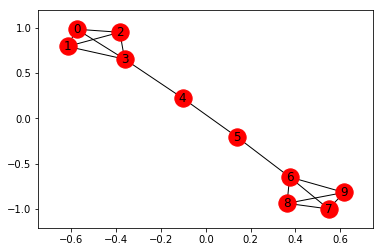

In [2]:
G = nx.barbell_graph(4,2)
A = nx.to_scipy_sparse_matrix(G,dtype=np.float64)
nx.draw_networkx(G)
plt.show()

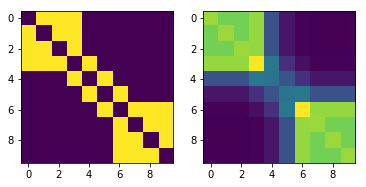

In [3]:
fig, axarr = plt.subplots(1,2)
axarr[0].imshow(A.todense())
axarr[1].imshow(expm(A.todense()))
plt.show()

As we can see the communicability within the groups are generally higher. Also it is important to note how the nodes closer to the "bridge" have higher communicability as there are better connected to the opposite group. Let's check a Stochastic Block Model(SBM) when it scales.

In [7]:
N = 100
G,labels = tg.sample_SBM(N,0.4,0.2)
A = nx.to_scipy_sparse_matrix(G,dtype=np.float64)

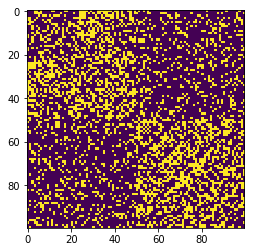

In [8]:
plt.imshow(A.todense())
plt.show()

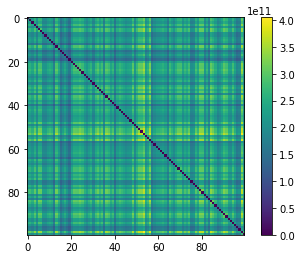

In [9]:
C_nonscaled = expm(A.todense())
C_nonscaled = C_nonscaled - np.diag(np.diag(C_nonscaled))
plt.imshow(C_nonscaled)
plt.colorbar()
plt.show()

As expected within groups are better communicated. However, note how the values have grown rapidly due the mapping $\lambda_i \mapsto e^{\lambda_i}$ where $\lambda_i$ is the i-th eigenvalue of A. This can be solved by dividing A by its maxiumum eigenvalue prior to calculate the exponential.
$$\frac{1}{\lambda}A = \frac{1}{\lambda}Q \Lambda Q^T = Q\frac{1}{\lambda}\Lambda Q^T$$
where $\lambda$ is the maxiumum eigenvalue of A.

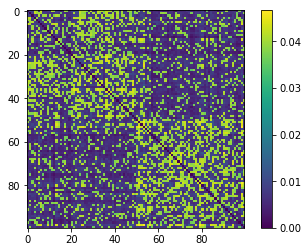

In [10]:
eig,vec = np.linalg.eig(A.todense())
C_scaled = expm(A.todense()/(max(eig)))
eigC,vec1 = np.linalg.eig(C_scaled)
C_scaled = C_scaled - np.diag(np.diag(C_scaled))
plt.imshow(C_scaled)
plt.colorbar()
plt.show()

This leads to a better differentation of the groups. As previous values with small connections are not mapped into high values. 

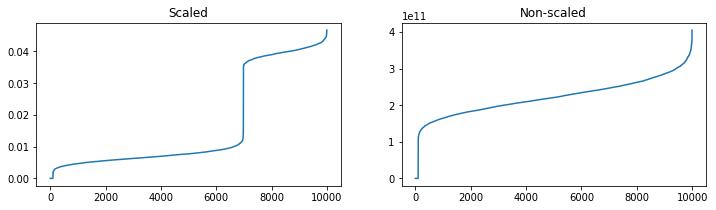

In [11]:
values_scaled = np.sort(np.reshape(C_scaled,(N*N)))
values_nonscaled = np.sort(np.reshape(C_nonscaled,(N*N)))
fig,axarr = plt.subplots(1,2,figsize=(12,3))
axarr[0].plot(values_scaled)
axarr[0].set_title('Scaled')
axarr[1].plot(values_nonscaled)
axarr[1].set_title('Non-scaled')
plt.show()

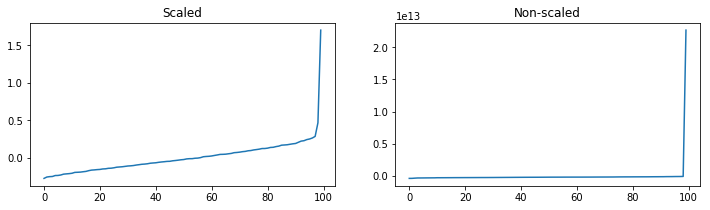

In [12]:
values_scaled = np.sort(np.linalg.eig(C_scaled)[0])
values_nonscaled = np.sort(np.linalg.eig(C_nonscaled)[0])
fig,axarr = plt.subplots(1,2,figsize=(12,3))
axarr[0].plot(values_scaled)
axarr[0].set_title('Scaled')
axarr[1].plot(values_nonscaled)
axarr[1].set_title('Non-scaled')
plt.show()

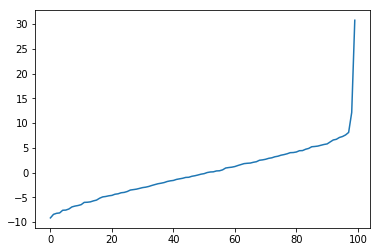

In [13]:
plt.plot(np.sort(np.linalg.eig(A.todense())[0]))
plt.show()

## Resolvent 

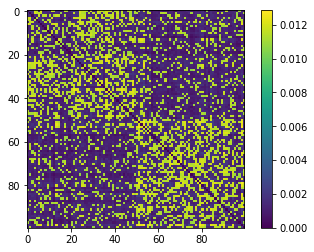

In [25]:
N = A.shape[0]
alpha = (1/float(N-1))
R = np.linalg.inv(np.eye(N)-alpha*A) 
R = R - np.diag(np.diag(R))
plt.imshow(R)
plt.colorbar()
plt.show()

In [123]:
Rp = np.eye(N) - 0.5*A.todense()
Y = np.dot(Rp.T,Rp)
unit = np.zeros(N)
unit[90] = 1
Yi = np.dot(unit.reshape(N,1),unit.reshape(1,N))
K = np.dot(np.dot(Rp.T,Yi),Rp)

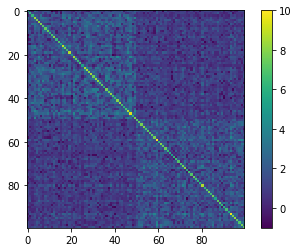

In [124]:
plt.imshow(Y)
plt.colorbar()
plt.show()

In [125]:
print Y[Y==0].shape
print A.todense()[A.todense()==0].shape
print K[K==0].shape

(1, 266)
(1, 7530)
(1, 9559)
